###  CNN for Fashion MNIST

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Deep_Reinforcement_Learning/blob/main/CNN_FashionMNIST.ipynb)

In [28]:
# import relevant libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [29]:
# Use the keras module to import the necessary data 
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

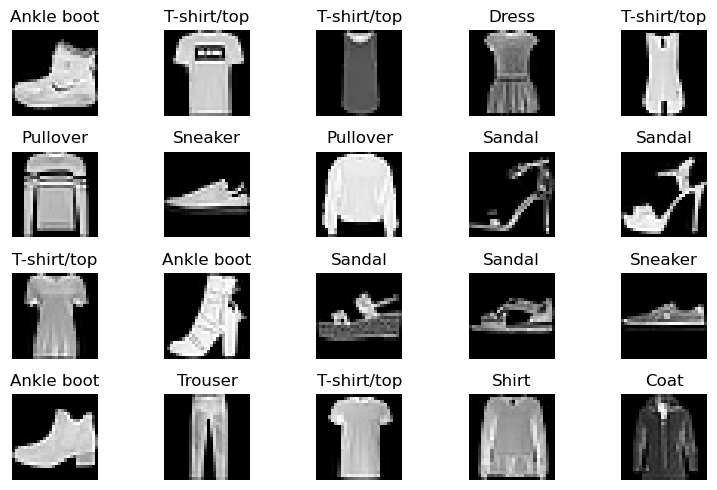

In [30]:

# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Scale pixel values to between 0 and 1
#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255

# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [31]:
def data_preprocessing(X, y, num_classes=10):
    label = tf.keras.utils.to_categorical(y, num_classes)
    num_images = len(y)
    #x_as_array = X[:,1:]
    x_shaped_array = X.reshape(num_images, 28, 28, 1)
    # Scale pixel values to between 0 and 1
    image = x_shaped_array / 255
    return image, label
num_classes = 10
X, y = data_preprocessing(x_train, y_train, num_classes)
X_test, y_test = data_preprocessing(x_test, y_test, num_classes)

In [32]:
Img_shape = 28
val_size = 0.25
random_state = 1234
No_epochs = 75
Batch_size = 128
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

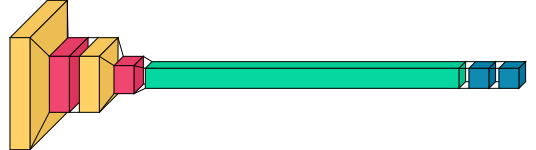

In [33]:
model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))
model.summary()
visualkeras.layered_view(model)

In [ ]:
plot_model(model, to_file='model.png')

In [34]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/75
352/352 [==============================] - 25s 70ms/step - loss: 0.5017 - accuracy: 0.8213 - val_loss: 0.3582 - val_accuracy: 0.8714
Epoch 2/75
352/352 [==============================] - 25s 71ms/step - loss: 0.3214 - accuracy: 0.8857 - val_loss: 0.3086 - val_accuracy: 0.8862
Epoch 3/75
352/352 [==============================] - 29s 82ms/step - loss: 0.2836 - accuracy: 0.8985 - val_loss: 0.2764 - val_accuracy: 0.8992
Epoch 4/75
352/352 [==============================] - 29s 82ms/step - loss: 0.2492 - accuracy: 0.9103 - val_loss: 0.2731 - val_accuracy: 0.9003
Epoch 5/75
352/352 [==============================] - 31s 88ms/step - loss: 0.2296 - accuracy: 0.9174 - val_loss: 0.2459 - val_accuracy: 0.9106
Epoch 6/75
352/352 [==============================] - 30s 87ms/step - loss: 0.2113 - accuracy: 0.9221 - val_loss: 0.2939 - val_accuracy: 0.8925
Epoch 7/75
352/352 [==============================] - 32s 91ms/step - loss: 0.1927 - accuracy: 0.9296 - val_loss: 0.2663 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(train_model.history['loss'], label='Training loss')
plt.plot(train_model.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()
plt.show()

In [ ]:
model2 = tf.keras.Sequential()

model2.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model2.add(Conv2D(64, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.3))
model2.add(BatchNormalization())
model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(512, activation='relu'))

model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

In [ ]:
#visualkeras.layered_view(model2)
model2.summary()
visualkeras.layered_view(model2)
plot_model(model2, to_file='model2.png')

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model2.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
train_model2 = model2.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

In [ ]:
# Evaluate the model on the test set
score = model2.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(train_model2.history['loss'], label='Training loss')
plt.plot(train_model2.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()
plt.show()